In [1]:
from pathlib import Path

repo_root = Path.cwd().resolve()
for _ in range(8):
    if (repo_root / 'paper2').exists():
        break
    repo_root = repo_root.parent

csv_path = repo_root / 'paper2' / 'data' / 'cross_hall_drift_baseline.csv'
bib_path = repo_root / 'paper2' / 'refs.bib'
print('CSV:', csv_path)
print('BibTeX:', bib_path)

CSV: C:\workspace\Physics\X-theta-framework\paper2\data\cross_hall_drift_baseline.csv
BibTeX: C:\workspace\Physics\X-theta-framework\paper2\refs.bib


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(csv_path)
df.head()

,T,delta_y,kappa,dA_dy,theta_dot,alpha
0,0.0,0.0000,1.0,0.75,2.0,0.5
1,0.1,0.0075,1.0,0.75,2.0,0.5
2,0.2,0.0300,1.0,0.75,2.0,0.5
3,0.3,0.0675,1.0,0.75,2.0,0.5
4,0.4,0.1200,1.0,0.75,2.0,0.5


In [3]:
t = df['T'].to_numpy()
y = df['delta_y'].to_numpy()

drift_total = float(y[-1] - y[0])
coef = np.polyfit(t, y, deg=1)
slope = float(coef[0])

print('Total Δy drift:', drift_total)
print('Linear slope d(Δy)/dT:', slope)

Total Δy drift: 18.75
Linear slope d(Δy)/dT: 3.750000000000001


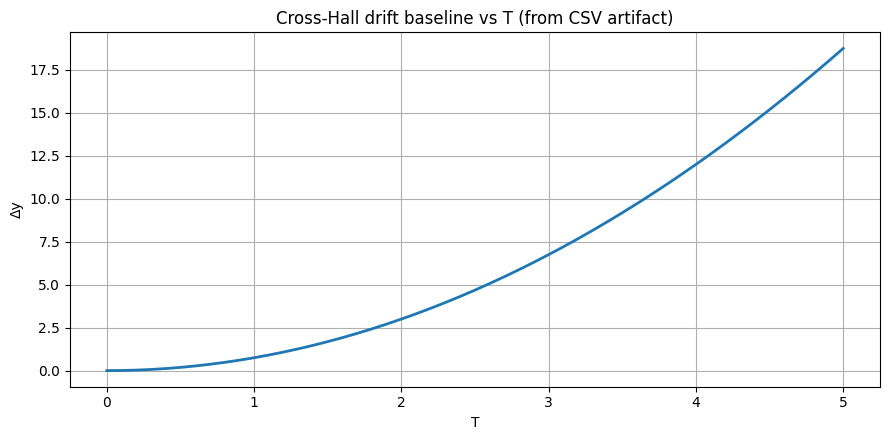

In [4]:
plt.figure(figsize=(9, 4.5))
plt.plot(t, y, linewidth=2)
plt.title('Cross-Hall drift baseline vs T (from CSV artifact)')
plt.xlabel('T')
plt.ylabel('Δy')
plt.grid(True)
plt.tight_layout()
plt.show()

## BibTeX key check

This is the notebook-side citation check: list the BibTeX keys you reference in notebook markdown and verify they exist in `paper2/refs.bib`.

If you later export notebooks with Pandoc, you can use keys like `[@Aharonov1959]`.


In [5]:
import re

bib_text = bib_path.read_text(encoding='utf-8', errors='ignore')
bib_keys = set(re.findall(r'@\w+\{([^,]+),', bib_text))

used_keys = {'Aharonov1959', 'Holdom1986'}
missing = sorted(k for k in used_keys if k not in bib_keys)

print('BibTeX keys found:', len(bib_keys))
print('Used keys:', sorted(used_keys))
if missing:
    raise ValueError(f'Missing BibTeX keys in paper2/refs.bib: {missing}')
print('OK: all used keys exist in paper2/refs.bib')

BibTeX keys found: 36
Used keys: ['Aharonov1959', 'Holdom1986']
OK: all used keys exist in paper2/refs.bib


In [6]:
# Generate missing figures used by paper2 LaTeX build
# - paper2/sections/00_overview.tex  -> drone_nav_overview.png
# - paper2/sections/01_framework.tex -> UG_S2_config_space_with_theta.png
from pathlib import Path

import matplotlib
matplotlib.use('Agg')  # headless-safe backend
import matplotlib.pyplot as plt

# Resolve repo root (this notebook defines repo_root in earlier cells, but keep it robust)
try:
    repo_root  # noqa: F821
    root = Path(repo_root)
except Exception:
    root = Path.cwd()
    for _ in range(8):
        if (root / 'paper2').exists():
            break
        root = root.parent

fig_dir = root / 'paper2' / 'figs'
fig_dir.mkdir(parents=True, exist_ok=True)

def write_drone_nav_overview(path: Path) -> None:
    fig = plt.figure(figsize=(8, 4.5), dpi=200)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.set_axis_off()

    ax.text(0.5, 0.92, 'Drone navigation analogy (placeholder)', ha='center', va='center', fontsize=16)

    # Base motion arrow
    ax.annotate('', xy=(0.82, 0.58), xytext=(0.18, 0.58), arrowprops=dict(arrowstyle='->', lw=2))
    ax.text(0.50, 0.63, 'base motion', ha='center', fontsize=12)

    # Theta dial (circle + arrow)
    circle = plt.Circle((0.25, 0.30), 0.10, fill=False, lw=2)
    ax.add_patch(circle)
    ax.annotate('', xy=(0.25, 0.40), xytext=(0.25, 0.30), arrowprops=dict(arrowstyle='->', lw=2))
    ax.text(0.25, 0.18, 'theta dial', ha='center', fontsize=12)

    # Holonomy note
    ax.text(0.70, 0.30, 'holonomy H\n(E=B=0)', ha='center', fontsize=12)

    fig.savefig(path, bbox_inches='tight', pad_inches=0.08)
    plt.close(fig)

def write_map_dial_config(path: Path) -> None:
    fig = plt.figure(figsize=(8, 4.5), dpi=200)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.set_axis_off()

    ax.text(0.5, 0.92, 'Configuration space: map × dial (placeholder)', ha='center', va='center', fontsize=16)

    # Map (rectangle)
    map_x0, map_y0, map_w, map_h = 0.12, 0.18, 0.52, 0.55
    rect = plt.Rectangle((map_x0, map_y0), map_w, map_h, fill=False, lw=2)
    ax.add_patch(rect)
    ax.text(map_x0 + map_w/2, map_y0 + map_h + 0.04, 'base space (map)', ha='center', fontsize=12)

    # A sample point in base space
    px, py = map_x0 + 0.65*map_w, map_y0 + 0.55*map_h
    ax.plot([px], [py], marker='o', markersize=6)
    ax.text(px, py - 0.05, 'X', ha='center', fontsize=11)

    # Dial attached to the point (circle to the right)
    cx, cy, r = 0.78, 0.45, 0.12
    circle = plt.Circle((cx, cy), r, fill=False, lw=2)
    ax.add_patch(circle)
    ax.annotate('', xy=(cx, cy + r), xytext=(cx, cy), arrowprops=dict(arrowstyle='->', lw=2))
    ax.text(cx, cy - r - 0.06, 'fiber dial (theta)', ha='center', fontsize=12)

    # Connection arrow from point to dial
    ax.annotate('', xy=(cx - r, cy), xytext=(px + 0.02, py), arrowprops=dict(arrowstyle='->', lw=1.8))
    ax.text(0.74, 0.26, 'mixed coupling\n(G_{μθ})', ha='center', fontsize=11)

    fig.savefig(path, bbox_inches='tight', pad_inches=0.08)
    plt.close(fig)

targets = {
    'drone_nav_overview.png': write_drone_nav_overview,
    'UG_S2_config_space_with_theta.png': write_map_dial_config,
}

for name, writer in targets.items():
    p = fig_dir / name
    writer(p)
    print(f'Wrote: {p}  ({p.stat().st_size} bytes)')

Wrote: C:\workspace\Physics\X-theta-framework\paper2\figs\drone_nav_overview.png  (44557 bytes)
Wrote: C:\workspace\Physics\X-theta-framework\paper2\figs\UG_S2_config_space_with_theta.png  (63700 bytes)
